In [28]:
from math import exp
from scipy import stats
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

# Problem One

## Hart: Cumulative Density Function

In [47]:
def caculateStandardNormalCDF(x):
    
    t = abs(x)
    t1 = 7.07106781186547
    t2 = 37
    t3 = 2.506628274631
    
    a1 = 0.0352624965998911
    a2 = 0.700383064443688
    a3 = 6.37396220353165
    a4 = 33.912866078383
    a5 = 112.079291497871
    a6 = 221.213596169931
    a7 = 220.206867912376
    b1 = 0.0883883476483184
    b2 = 1.75566716318264
    b3 = 16.064177579207
    b4 = 86.7807322029461
    b5 = 296.564248779674
    b6 = 637.333633378831
    b7 = 793.826512519948
    b8 = 440.413735824752
    
    A = ((((((a1*t+a2)*t+a3)*t+a4)*t+a5)*t+a6)*t+a7)
    B = (((((((b1*t+b2)*t+b3)*t + b4)*t + b5)*t + b6)*t + b7)*t + b8)
    C = (t+1)/(t + 2/(t + 3/(t + 4/(t + 0.65))))
    
    if t<t1:
        N = exp(-1*(t**2/2))*(A/B)
    elif t1<=t<=t2:
        N = exp(-1*t**2/2)*1/(t3*C)
    else:
        N = 0
    
    if x<0:
        return N
    else:
        return 1-N

## Test

In [51]:
def main():
    x1 = -0.02
    x2 = -0.8
    x3 = 0.182
    x =  [x1,x2,x3]
    for i in range(len(x)):
        if caculateStandardNormalCDF(x[i])==stats.norm.cdf(x[i]):
            print("Well done!")

In [52]:
main()

Well done!
Well done!
Well done!


## Multithreading

In [54]:
import threading
import time

def addHarmonicSeries(n):
    sum=0.0
    for i in range(1,n):
        sum=sum + 1.0/i
        print('{:5d} {:12.6f}'.format(i, sum))
    start_time = time.clock()
    no_thread = 100
    for i in range(no_thread):
        t = threading.Thread(target=addHarmonicSeries, args=(i,))
        t.start()
        print("\n-->"+t.getName() + "\n")
        time.sleep(1)


    print ("\n The main stread stops after {}".format(time.clock()-start_time)+" seconds")

# Problem Two

## Monte Carlo Simulation with BSM model

In [58]:
def mc_pricing(S, K, T, r, sigma, option_type, no_trial):
    random.seed(10000)
    z = random.standard_normal(no_trial)
    ## stock price at Time T
    ST = S * exp( (r - 0.5 * sigma**2) * T+ sigma * sqrt(T) * z)
    if option_type == 'call':
        payoff = maximum(ST - K,0)
        eu_call_price = exp(-r*T)*sum(payoff)/no_trial
        print("This European call price is: ${:20.16f}".format(eu_call_price))
    else:
        payoff = maximum(K - ST,0)
        eu_put_price = exp(-r*T)*sum(payoff)/no_trial
        print("This European put price is: ${:20.16f}".format(eu_put_price))

**An European call with continuous dividend yield:**

In [59]:
no_trial = 10**7
S = 50
K = 80,
r = 0.1
T = 5/12
sigma = 0.35
option_type = 'call'
mc_pricing(S, K, T, r, sigma, option_type, no_trial)

This European call price is: $  0.1556393834890468


**An European put option on stock indexes with a cost-of-carry:**

In [60]:
no_trial = 1000
S = 80
K = 75
r = 0.1
T = 5/12
sigma = 0.20
option_type = 'put'
mc_pricing(S, K, T, r, sigma, option_type, no_trial)

This European put price is: $  1.2921363260971719


## Visualization

In [38]:
def mc_pricing_all(S, K, T, r, sigma, option_type, no_trial):
    random.seed(1000)
    z = random.standard_normal(no_trial)
    ## stock price at Time T
    ST = S * exp( (r - 0.5 * sigma**2) * T+ sigma * sqrt(T) * z)
    if option_type == 'call':
        payoff = maximum(ST - K,0)
        eu_call_price = exp(-r*T)*payoff
        return eu_call_price
    else:
        payoff = maximum(K - ST,0)
        eu_put_price = exp(-r*T)*payoff
        return eu_put_price

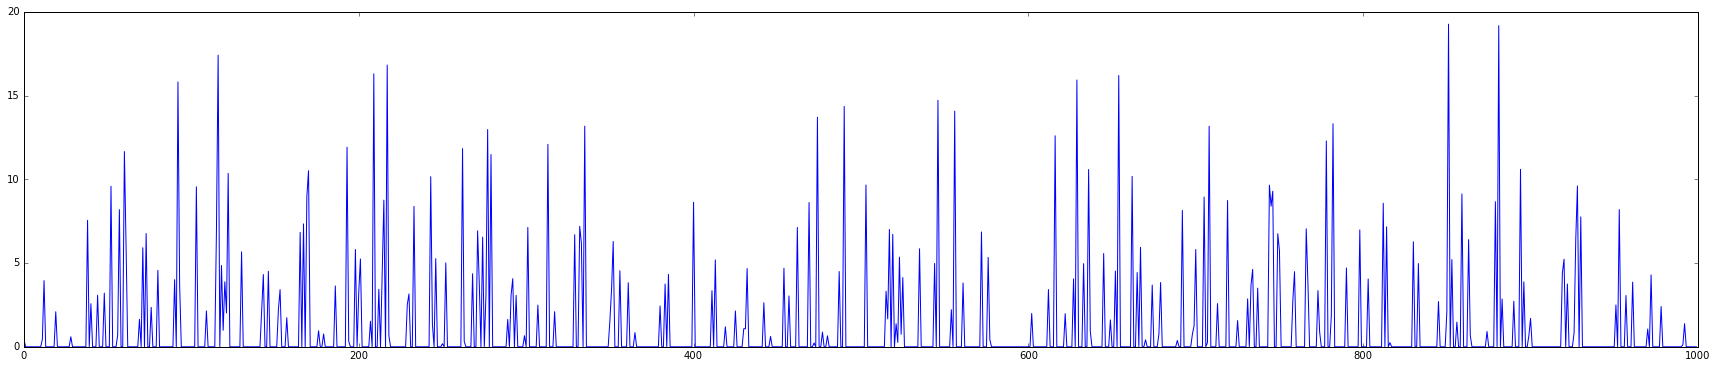

In [56]:
no_trial = 1000
S = 80
K = 75
r = 0.1
T = 5/12
sigma = 0.20
option_type = 'put'
price_put = mc_pricing_all(S, K, T, r, sigma, option_type, no_trial)
plt.figure(figsize=(30,6))
plt.plot(price_put)

(array([ 827.,   52.,   42.,   29.,   19.,    9.,   10.,    4.,    5.,    3.]),
 array([  0.        ,   1.92737373,   3.85474745,   5.78212118,
          7.70949491,   9.63686863,  11.56424236,  13.49161609,
         15.41898981,  17.34636354,  19.27373726]),
 <a list of 10 Patch objects>)

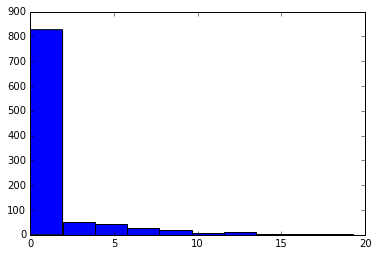

In [35]:
hist(price_put)

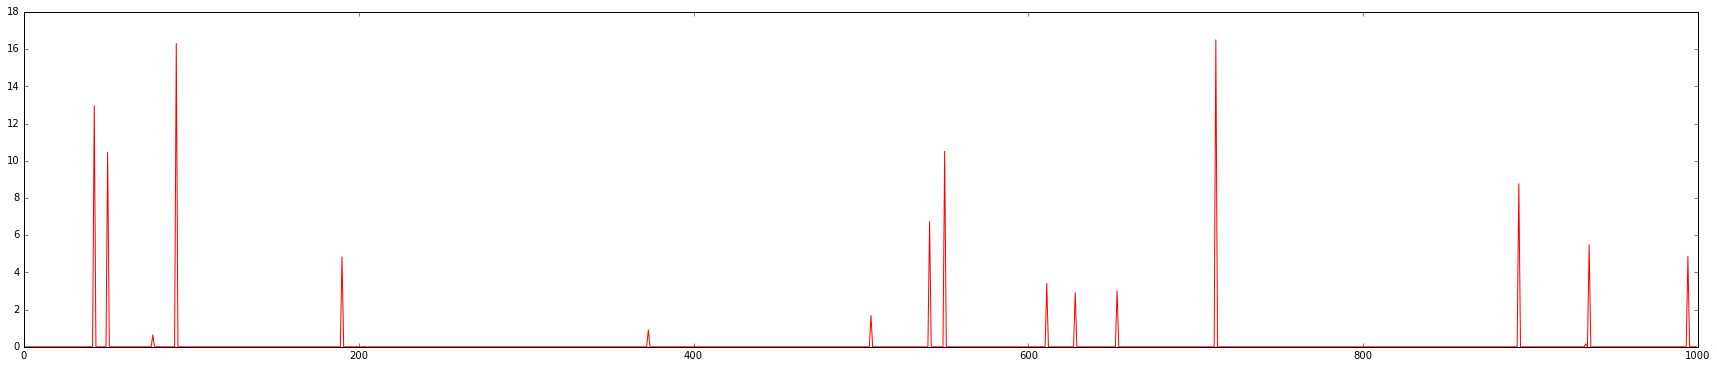

In [57]:
no_trial = 1000
S = 50
K = 80,
r = 0.1
T = 5/12
sigma = 0.35
option_type = 'call'
price_call = mc_pricing_all(S, K, T, r, sigma, option_type, no_trial)
plt.figure(figsize=(30,6))
plt.plot(price_call,color = 'red')

## Simulation with Threading??

# Problem Three

## Black-Scholes Development

In [26]:
def bs_pricing(S,K,T,r,sigma,option_type):

    if option_type == 'call':
        d1 = (log(S/K) + (r + 0.5 * sigma ** 2) * T)/ ( sigma * sqrt(T))
        d2 = d1 - sigma * sqrt(T)
        N_d1 = stats.norm.cdf(d1, 0.0, 1.0)
        N_d2 = stats.norm.cdf(d2, 0.0, 1.0)
        call_price = (S * N_d1 - K* exp(-r * T)* N_d2)
        print("This European call price is: ${:20.16f}".format(call_price))
    else:
        d1 = (log(S/K) + (r + 0.5 * sigma ** 2) * T)/ ( sigma * sqrt(T))
        d2 = d1 - sigma * sqrt(T)
        N_d2 = stats.norm.cdf(-d2, 0.0, 1.0)
        N_d1 = stats.norm.cdf(-d1, 0.0, 1.0)
        put_price = K* exp(-r * T)* N_d2 - S * N_d1
        print("This European put price is: ${:20.16f}".format(put_price))

## Test

In [27]:
S = 102.5 
K = 88.5
r = 0.03
T = 0.25
sigma= 0.3
option_type= 'put'
bs_pricing(S,K,T,r,sigma,option_type)

This European put price is: $  1.1196098062956548


In [28]:
S = 89.0 
K = 100.0
T = 0.5
r = 0.02
sigma = 0.20
option_type = 'call'
bs_pricing(S,K,T,r,sigma,option_type)

This European call price is: $  1.7288248467919196


## Correct

## BS model with divident and cost of carry 

In [37]:
def bsm_pricing(S,K,T,r,sigma,q,option_type):

    ##q: divident yield

    if option_type == 'call':
        d1 = (log(S/K) + (r + 0.5 * sigma ** 2) * T)/ ( sigma * sqrt(T))
        d2 = d1 - sigma * sqrt(T)
        N_d1 = stats.norm.cdf(d1, 0.0, 1.0)
        N_d2 = stats.norm.cdf(d2, 0.0, 1.0)
        call_price = S*exp(-q*T)*N_d1 - K*exp(-r * T) * N_d2
        print("This European call price is: ${:20.16f}".format(call_price))
    else:
        d1 = (log(S/K) + (r + 0.5 * sigma ** 2) * T)/ ( sigma * sqrt(T))
        d2 = d1 - sigma * sqrt(T)
        N_d2 = stats.norm.cdf(-d2, 0.0, 1.0)
        N_d1 = stats.norm.cdf(-d1, 0.0, 1.0)
        put_price = -S*exp(-q*T)*N_d1 + K*exp(-r * T) * N_d2
        print("This European put price is: ${:20.16f}".format(put_price))

**An European call with continuous dividend yield:**

In [38]:
S = 50
K = 80
r = 0.1
sigma = 0.35
T = 5/12
q = 0.05
option_type = 'call'
bsm_pricing(S, K, T, r, sigma, q,option_type)

This European call price is: $  0.1171189179414789


** An European put option on stock indexes with a cost-of-carry:**

In [39]:
S = 80
K = 75
r = 0.1
T = 5/12
sigma = 0.20
q = 0.07
option_type = 'put'
bsm_pricing(S, K, T, r, sigma, q,option_type)

This European put price is: $  1.5607311841219147
